# Data Scholar :: Code Along :: Covid-19 Detection using Computer Vision

### Import Libraries

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Clone & Explore Data

In [2]:
! git clone https://github.com/education454/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


### Visualise the Data

In [6]:
import os
main_dir = '/content/datasets/Data'
train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [7]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:5])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:5])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:5])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:5])

['COVID-19 (15).jpg', 'COVID-19 (7).jpg', 'COVID19(15).jpg', 'COVID19(456).jpg', 'COVID19(527).jpg']
['NORMAL(1470).jpg', 'NORMAL(919).jpg', 'NORMAL(1252).jpg', 'NORMAL(1208).jpg', 'NORMAL(875).jpg']
['COVID19(337).jpg', 'COVID19(415).jpg', 'COVID-19 (425).jpg', 'COVID19(382).jpg', 'COVID19(324).jpg']
['NORMAL(1197).jpg', 'NORMAL(1190).jpg', 'NORMAL(833).jpg', 'NORMAL(393).jpg', 'NORMAL(796).jpg']


In [ ]:
print('Total images in training: ', len(train_covid_names+train_normal_names))
print('Total images in testing: ', len(test_covid_names+test_normal_names))

### Data Visualisation

['/content/datasets/Data/train/COVID19/COVID-19 (15).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (7).jpg', '/content/datasets/Data/train/COVID19/COVID19(15).jpg', '/content/datasets/Data/train/COVID19/COVID19(456).jpg', '/content/datasets/Data/train/COVID19/COVID19(527).jpg', '/content/datasets/Data/train/COVID19/COVID19(436).jpg', '/content/datasets/Data/train/COVID19/COVID19(242).jpg', '/content/datasets/Data/train/COVID19/COVID19(180).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1470).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(919).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1252).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1208).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(875).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(419).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(480).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(249).jpg']


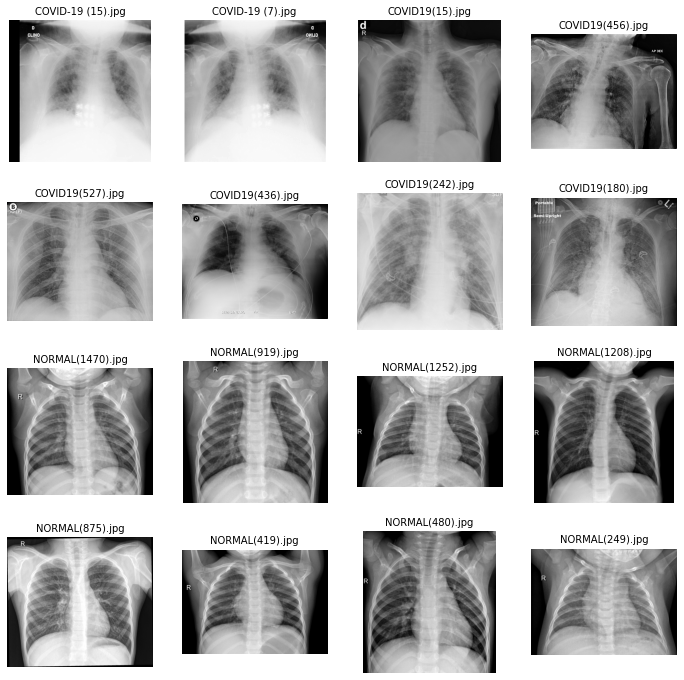

In [9]:
import matplotlib.image as mpimg

rows = 4
cols = 4

fig = plt.gcf()
fig.set_size_inches(12, 12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img+normal_img

for i, img_path in enumerate(merged_img):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols, i+1)
  img = mpimg.imread(img_path)
  sp.axis('Off')
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap = 'gray')

plt.show()

### Data Preprocessing

In [10]:
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255)

dgen_test = ImageDataGenerator(rescale = 1./255)

In [11]:
train_gen = dgen_train.flow_from_directory(train_dir,
                                           target_size=(150, 150),
                                           subset = 'training',
                                           batch_size = 32,
                                           class_mode = 'binary')

validation_gen = dgen_train.flow_from_directory(train_dir,
                                           target_size=(150, 150),
                                           subset = 'validation',
                                           batch_size = 32,
                                           class_mode = 'binary')

test_gen = dgen_test.flow_from_directory(test_dir,
                                           target_size=(150, 150),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [12]:
train_gen.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [13]:
train_gen.image_shape

(150, 150, 3)

### Build a Convolutional Neural Network

In [14]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu',
                 input_shape=(150, 150, 3)))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

### Compile and Train Model

In [15]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
history = model.fit(train_gen,
                    epochs = 30,
                    validation_data = validation_gen)

Epoch 1/30
46/46 [==============================] - 52s 1s/step - loss: 0.8657 - accuracy: 0.7626 - val_loss: 0.6000 - val_accuracy: 0.8066
Epoch 2/30
46/46 [==============================] - 47s 1s/step - loss: 0.2698 - accuracy: 0.8930 - val_loss: 0.4505 - val_accuracy: 0.9144
Epoch 3/30
46/46 [==============================] - 47s 1s/step - loss: 0.1628 - accuracy: 0.9455 - val_loss: 0.1725 - val_accuracy: 0.9503
Epoch 4/30
46/46 [==============================] - 46s 1s/step - loss: 0.1760 - accuracy: 0.9393 - val_loss: 0.1963 - val_accuracy: 0.9558
Epoch 5/30
46/46 [==============================] - 48s 1s/step - loss: 0.1350 - accuracy: 0.9565 - val_loss: 0.1582 - val_accuracy: 0.9503
Epoch 6/30
46/46 [==============================] - 46s 1s/step - loss: 0.1384 - accuracy: 0.9586 - val_loss: 0.1171 - val_accuracy: 0.9669
Epoch 7/30
46/46 [==============================] - 47s 1s/step - loss: 0.1550 - accuracy: 0.9441 - val_loss: 0.1313 - val_accuracy: 0.9586
Epoch 8/30
46/46 [==

### Evaluate the Performance

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Predict on New Data

Text(0.5, 0, 'epoch')

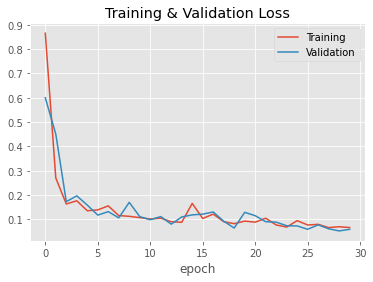

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training & Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

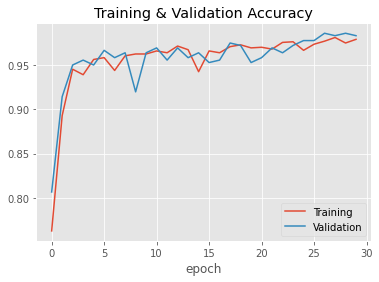

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training & Validation Accuracy')
plt.xlabel('epoch')

In [21]:
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss: {} Test Accuracy: {}'.format(test_loss, test_accuracy))

16/16 [==============================] - 10s 650ms/step - loss: 0.1073 - accuracy: 0.9525
Test Loss: 0.10734717547893524 Test Accuracy: 0.952479362487793


### Predict on Unseen Data

In [23]:
from google.colab import files
import keras.utils as image
uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  pred = model.predict(images)
  print(filename)

  if pred == 0:
    print("Covid Detected!")
  else:
    print('No Covid Detected')


Saving covid1.jpg to covid1.jpg
Saving covid2.jpeg to covid2.jpeg
Saving normal2 (1).jpg to normal2 (1).jpg
Saving normal2.jpg to normal2.jpg
1/1 [==============================] - 0s 176ms/step
covid1.jpg
Covid Detected!
1/1 [==============================] - 0s 19ms/step
covid2.jpeg
Covid Detected!
1/1 [==============================] - 0s 17ms/step
normal2 (1).jpg
No Covid Detected
1/1 [==============================] - 0s 17ms/step
normal2.jpg
No Covid Detected
